# **Project Name**    - Online Retail Customer Segmentation.



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Aman Sharma

# **Project Summary -**

This project is about customer segmentation for a UK-based online retail business that specializes in unique all-occasion gifts. The main steps and objectives of the project are:

* Using a transaction data set that contains customer ID, country, StockCode, description, quantity, unit price, invoice number, and invoice date.

* Applying RFM analysis, a technique that segments customers based on three factors: recency (how recently they purchased), frequency (how often they purchased), and monetary value (how much they spent).

* Identifying different customer segments based on their RFM values and their purchasing behavior and characteristics.

* Using various clustering models in Python, such as k-means, hierarchical clustering (Agglomerative), DBSCAN, and GMM, to group the customers into clusters based on their RFM values.Comparing the performance of these models using metrics such as silhouette score.

* Providing insights into the characteristics and preferences of each customer segment and suggesting marketing and sales strategies to target them effectively.

* Aiming to help the business improve customer satisfaction and increase revenue by offering personalized and relevant products and services to each customer segment.

**Steps involved in building a ML Model:**

> Step 1: Data gathering and Understanding

> Step 2: Data preparation

> Step 3: Data Cleaning

> Step 4: Exploratory data analysis

> Step 5: Feature engineering and selection

> Step 6: ML Model assumption and checks

> Step 7: Data preparation for modelling

> Step 8: Model Building

> Step 9: Model Validation & Evaluation

> Step 10: Predictions & Saving model using pickel library.


**Libraries used in EDA & Machine Learning:**
1. Pandas
2. Numpy
3. Matplotib
4. Seaborn
5. Plotly
6. Sklearn
7. Scipy


**Graphs used for representation:**
1. Bar plot
2. Pie plot
3. Correlation Plot
6. Heatmap
7. Pair plot


**ML Models used for training & testing:**
1. K means Clustering	
2. Hierarchial Clustering		
3. DBSCAN	
4. Gaussian Mixture Model


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. rfm_model

# ***Let's Begin !***

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd
from datetime import datetime

#For visualization purpose
import seaborn as sns
import plotly.express as x
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

#For hypothesis testing
import scipy.stats as stats
from scipy.stats import chi2_contingency

#For Scaling the data
from sklearn.preprocessing import StandardScaler

#For Visulization of metrics scores
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import scipy.cluster.hierarchy as sch

#Models from Scikit-Learn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Model saving
import pickle

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset =pd.read_csv('/content/drive/MyDrive/Data/Online Retail.csv')

In [ ]:
# Creating a copy named df from dataset
df = dataset.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5225
Country        5268
dtype: int64

In [ ]:
# Droping duplicate values from the dataset
df.drop_duplicates(inplace = True)

In [ ]:
# Checking rows and columns after droping duplicate values.
df.shape

(536641, 8)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

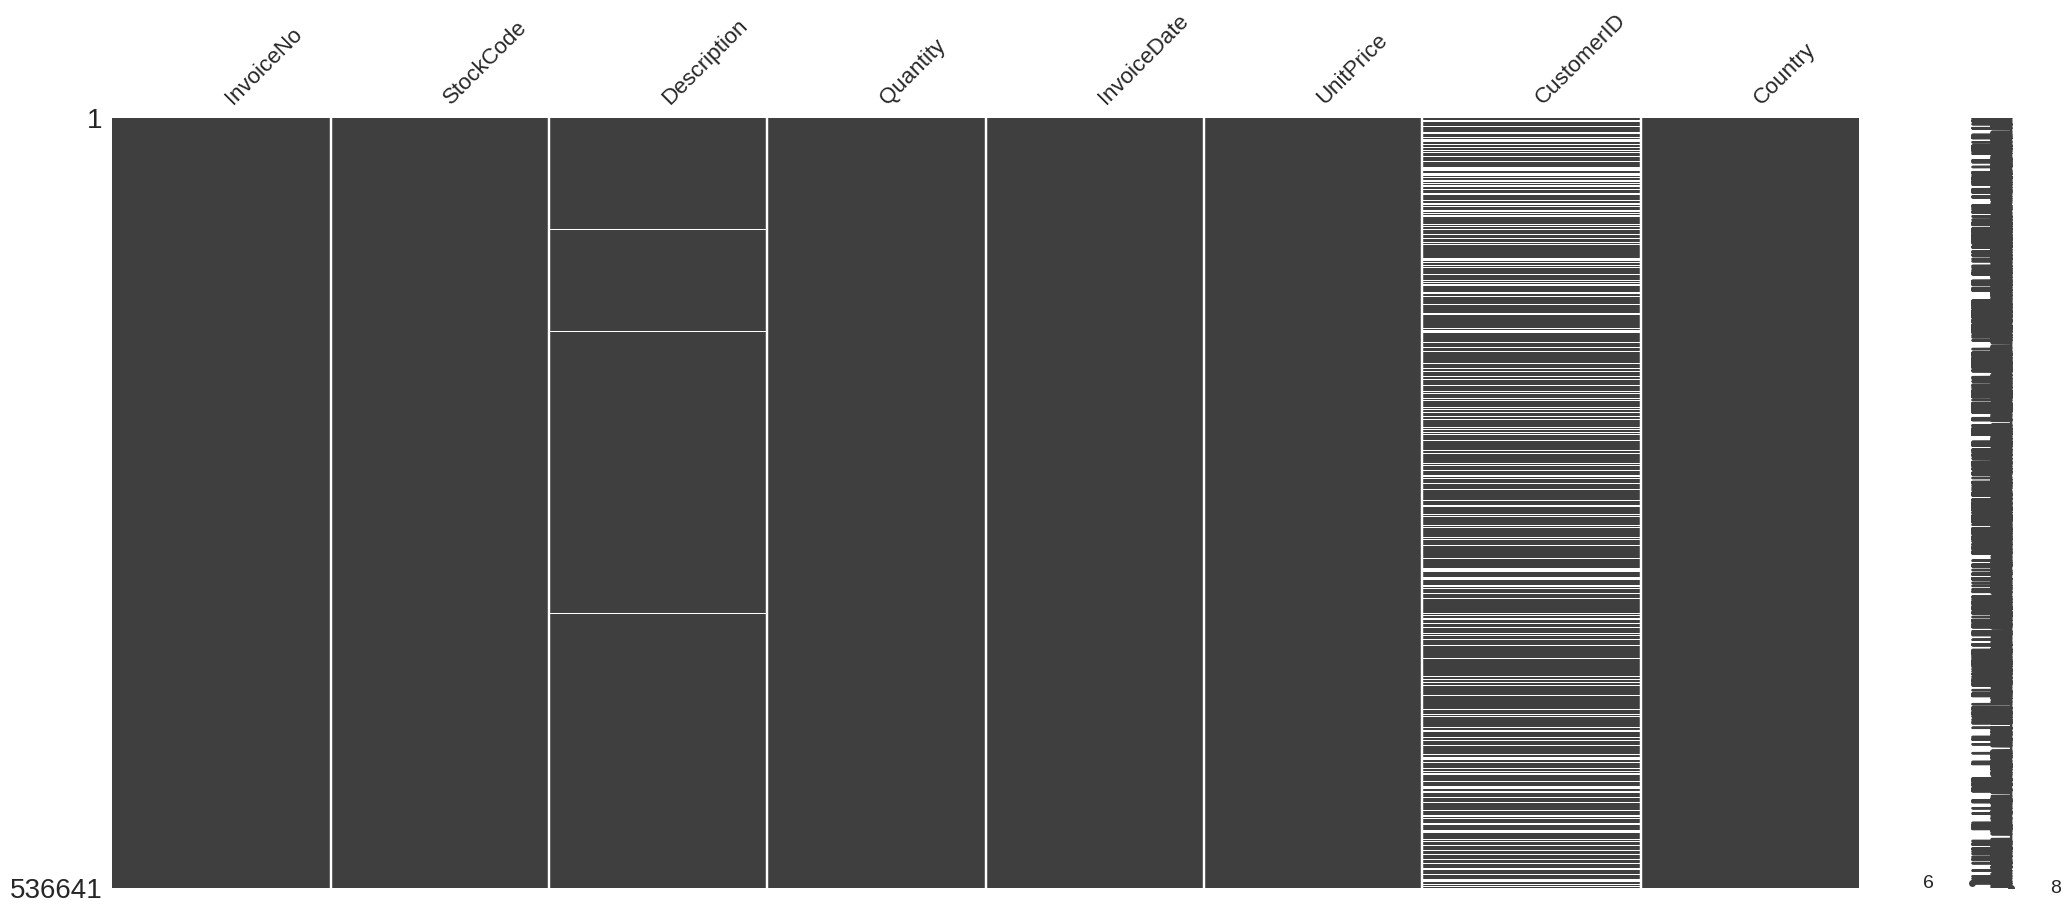

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)
plt.show()

In [ ]:
# Removeing cancelled order form dataset.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df=df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# droping NaN values 
df= df.dropna(axis = 0)

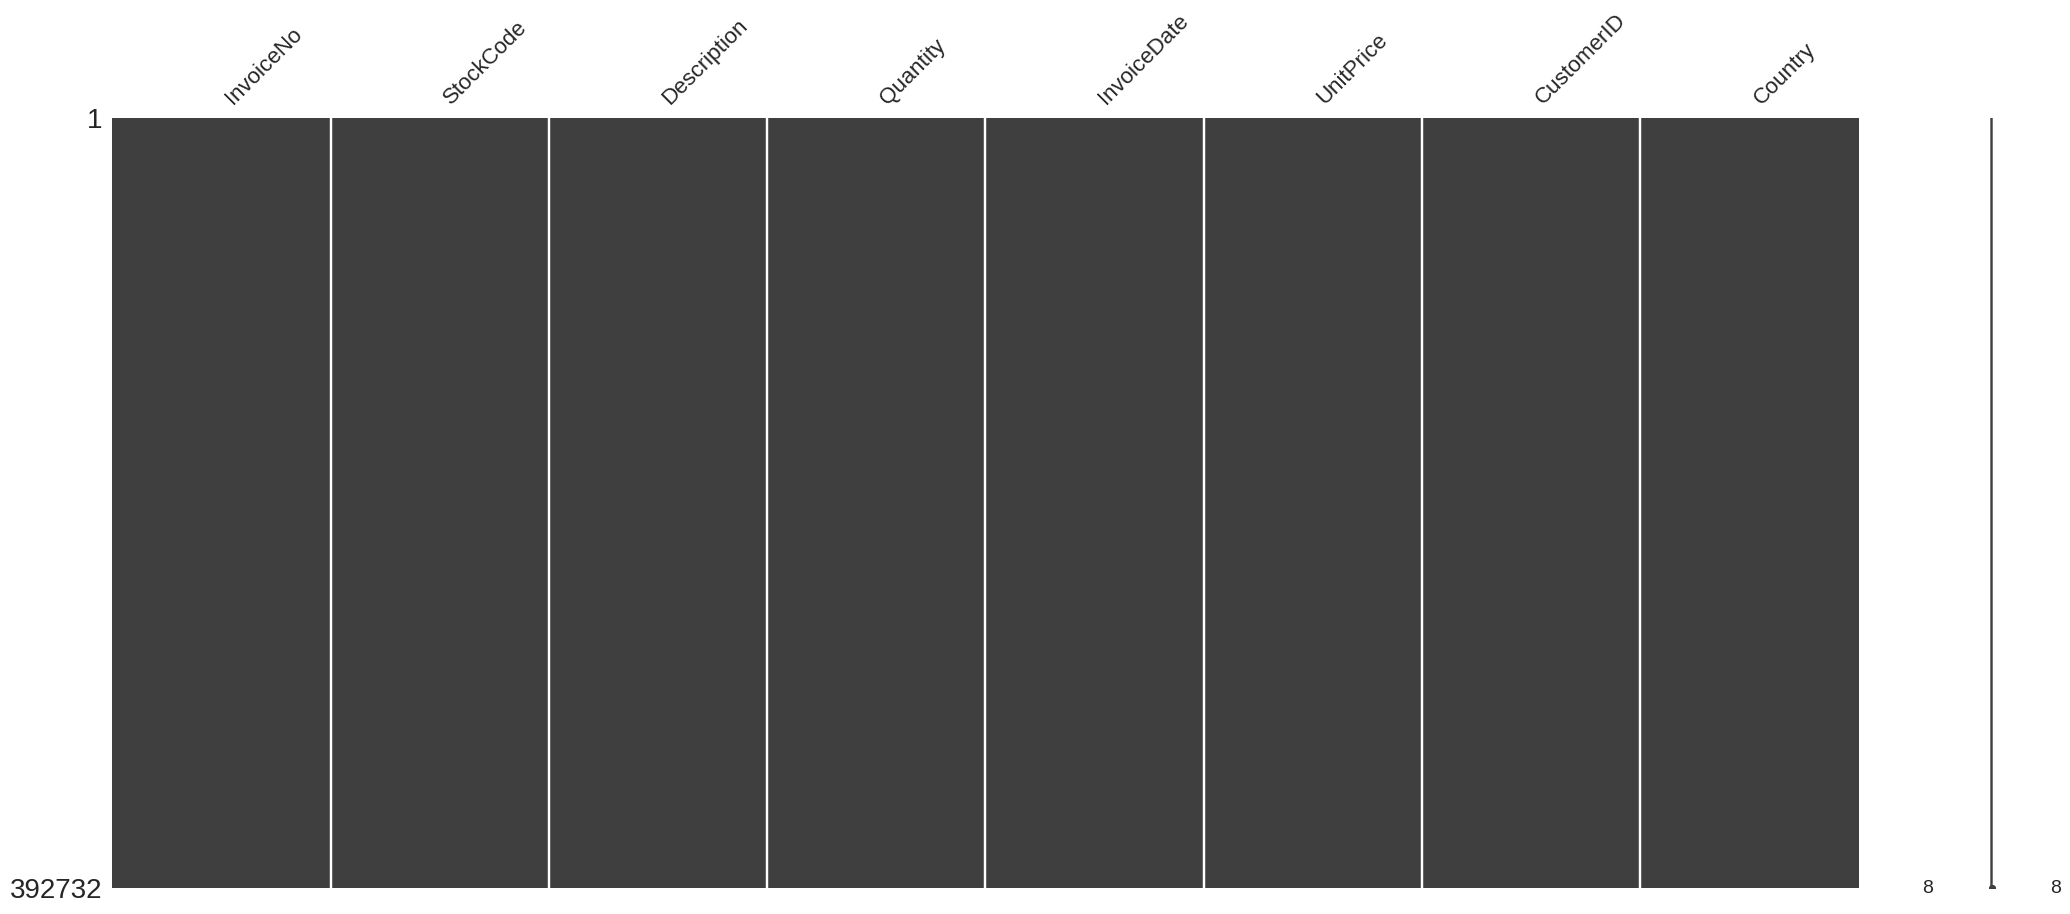

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)
plt.show()

### What did you know about your dataset?

####1) The dataset comprises 8 rows and 541,909 columns.
####2) There are 1,454 missing values in the 'Description' column and 135,037 missing values in the 'CustomerID' column in the dataset.
####3) There are 5,268 duplicate values present in the dataset.
####4) The variables 'InvoiceNo', 'StockCode', 'Description', 'Quantity', and 'InvoiceDate' contain values of type 'object', while the remaining variables contain numeric values.
####5) If the feature named 'InvoiceNo' starts with the letter 'c', it typically indicates a cancellation of an order.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,392732,392732,392732,392732.000000,392732,392732.000000,392732.000000,392732
unique,18536,3665,3877,NaN,17286,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,11/14/11 15:27,NaN,NaN,United Kingdom
freq,542,2023,2016,NaN,542,NaN,NaN,349227
mean,NaN,NaN,NaN,13.153718,NaN,3.125596,15287.734822,NaN
std,NaN,NaN,NaN,181.588420,NaN,22.240725,1713.567773,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13955.000000,NaN
50%,NaN,NaN,NaN,6.000000,NaN,1.950000,15150.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16791.000000,NaN


### Variables Description 

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.

**UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country**: Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f"Unique {i}'s count:{dataset[i].nunique()}\n--------------------------------------------------------------")

Unique InvoiceNo's count:25900
--------------------------------------------------------------
Unique StockCode's count:4070
--------------------------------------------------------------
Unique Description's count:4223
--------------------------------------------------------------
Unique Quantity's count:722
--------------------------------------------------------------
Unique InvoiceDate's count:23260
--------------------------------------------------------------
Unique UnitPrice's count:1630
--------------------------------------------------------------
Unique CustomerID's count:4372
--------------------------------------------------------------
Unique Country's count:38
--------------------------------------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Converting string Object in datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%y %H:%M')

In [ ]:
# Create three new columns named year, month, day from InvoiceDate
df['year']= df['InvoiceDate'].dt.year
df['month']= df['InvoiceDate'].dt.month
df['day']= df['InvoiceDate'].dt.weekday
df['hour'] = df['InvoiceDate'].dt.hour

In [ ]:
# Create a new feature named TotalAmount
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']

In [ ]:
# Creating a dataframe form cancel orders
cancelled_orders_df = dataset[dataset['InvoiceNo'].str.contains('C')]

In [ ]:
# Converting string Object in datetime object in cancelled_orders_df for anaylsis
cancelled_orders_df['InvoiceDate'] = pd.to_datetime(cancelled_orders_df['InvoiceDate'],format='%m/%d/%y %H:%M')

# creating on feature named weekday and extracting day number.
cancelled_orders_df['day'] = cancelled_orders_df['InvoiceDate'].dt.weekday

In [ ]:
# getting the number of cancelled orders based on weekday 
cancelled_orders_by_day = cancelled_orders_df.day.value_counts().reset_index().rename(columns = {'index':'day','day':'cancelled_orders'})
cancelled_orders_by_day.head(3)

,day,cancelled_orders
0,3,2355
1,1,1748
2,2,1729


In [ ]:
# Number of orders cancel from each country
cdf = cancelled_orders_df.Country.value_counts().reset_index().rename(columns = {'index':'country','Country':'cancelled_orders'})
cdf.head(3)

,country,cancelled_orders
0,United Kingdom,7856
1,Germany,453
2,EIRE,302


In [ ]:
# Printing start and end date
print(df.InvoiceDate.min())
print(df.InvoiceDate.max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [ ]:
# getting Number of orders cancels for each product
cancel_o = cancelled_orders_df['Description'].value_counts().reset_index().rename(columns = {'index':'Description','Description':'cancelled_orders'})
cancel_o.head(3)

,Description,cancelled_orders
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126


In [ ]:
# getting customers who cancel most number of orders 
most_c_orders = cancelled_orders_df.CustomerID.value_counts().reset_index().rename(columns = {'index':'CustomerID','CustomerID':'cancelled_orders'})
most_c_orders.head(3)

,CustomerID,cancelled_orders
0,14911.0,226
1,17841.0,136
2,17511.0,113


In [ ]:
# getting popular products based on number of orders 
item_p = df['Description'].value_counts().sort_values(ascending = False).reset_index()
item_p.rename(columns={'index':'Description','Description':'popularity'},inplace= True)
item_p.head(3)

,Description,popularity
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1615


In [ ]:
# getting popular products based on number of quantity
item_q = df.groupby(['Description'])['Quantity'].sum().sort_values(ascending = False).reset_index()
item_q.head(3)

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319


In [ ]:
# getting customer who spend the Highest
t = df[['CustomerID','TotalAmount']]
top_c = t.groupby(['CustomerID'])['TotalAmount'].sum().reset_index().sort_values(by = 'TotalAmount',ascending = False)
top_c = top_c.reset_index()
top_c.drop('index',axis = 1,inplace = True)
top_c.head(3)

,CustomerID,TotalAmount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79


In [ ]:
# getting top cuntry based on amount spend by customers and quantity orderd.
country_df = df.groupby(['Country']).agg({'TotalAmount':'sum','Quantity':'sum'}).reset_index().rename(columns = {'Country':'country_name'}).sort_values(by ='TotalAmount',ascending=False)
country_df.head(3)

,country_name,TotalAmount,Quantity
35,United Kingdom,7285024.644,4254037
23,Netherlands,285446.340,200937
10,EIRE,265262.460,140383


In [ ]:
# getting top peforming items in the United Kingdom	
Top_uk_items = df[df['Country']=='United Kingdom'].groupby(['Description'])['Quantity','TotalAmount'].sum().sort_values(by ='Quantity', ascending = False)
Top_uk_items.head(3)

,Quantity,TotalAmount
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
MEDIUM CERAMIC TOP STORAGE JAR,76919,80291.44
WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086,12109.96


In [ ]:
# getting top country based on orders 
country_orders = df.Country.value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index':'country','Country':'orders'})
country_orders.head(3)

,country,orders
0,United Kingdom,349227
1,Germany,9027
2,France,8327


In [ ]:
# getting number of orders by years
year_df = df.year.value_counts().reset_index().rename(columns = {'index':'year','year':'orders_counts'})
year_df

,year,orders_counts
0,2011,367059
1,2010,25673


In [ ]:
# getting number of orders by month
month_df = df.month.value_counts().reset_index().rename(columns = {'index':'month','month':'total_orders'})
month_df.head(3)

,month,total_orders
0,11,63182
1,10,48796
2,12,42699


In [ ]:
# getting number of orders by weekday
day_df = df.day.value_counts().reset_index().rename(columns = {'index':'day','day':'total_orders'})
day_df.head(3)

,day,total_orders
0,3,79260
1,2,68043
2,1,65747


In [ ]:
# getting number of orders by hours
hour_df = df.hour.value_counts().reset_index().rename(columns = {'index':'hour','hour':'total_orders'})
hour_df.head(3)

,hour,total_orders
0,12,70942
1,13,63024
2,14,53260


### What all manipulations have you done and insights you found?

* To facilitate analysis of the 'InvoiceDate' variable, I converted it from a string type to a datetime object.
* I extracted the hour, day, month, and year components from the 'InvoiceDate' column for further analysis.
* To investigate the number of cancelled orders in the dataset, I created a new dataframe called 'cancelled_orders_df'.
* In order to determine the total amount spent by customers, I created a new feature called 'TotalAmount'.
* The dataset includes records from December 1st, 2010 at 8:26 AM until December 9th, 2011 at 12:50 PM. 





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# creating a fuction for ploting bar graph.
def barplot(df):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(data=df,x = df.iloc[:,0],y= df.iloc[:,1])
    plt.title(f"Total orders by {df.columns[0]}")
    plt.show()

In [ ]:
# creating a fuction for ploting bar graph.
def B_plot(df):
    plt.figure(figsize=(10,5))
    ax = sns.barplot(data=df,x = df.iloc[:,0],y= df.iloc[:,1])
    plt.title(f"Distribution based on {df.columns[0]} and {df.columns[1]}")
    plt.xticks(rotation=90);
    plt.show()

#### Chart - 1

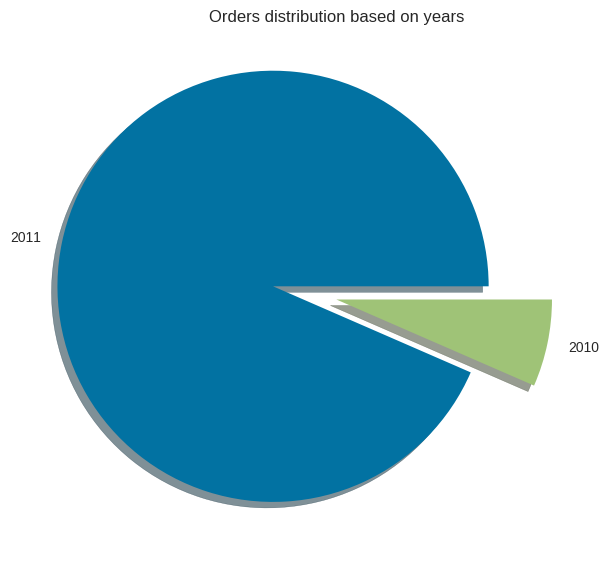

In [ ]:
# Checking number of orders in diffrent years
myexplode = [0.3, 0]
mylabels = ['2011', "2010"]
fig = plt.figure(figsize =(10, 7))
plt.pie(year_df['orders_counts'], labels = mylabels, explode = myexplode, shadow = True)
plt.title("Orders distribution based on years")
plt.show() 

##### 1. Why did you pick the specific chart?

> The pie chart is visually striking and easy to understand.
The pie chart gives us an idea of the relative proportion for each category of data at a single glance.permit a visual check of the reasonableness or accuracy of calculations.

##### 2. What is/are the insight(s) found from the chart?

* the maximum number of sales can be observed in year 2011.

#### Chart - 2

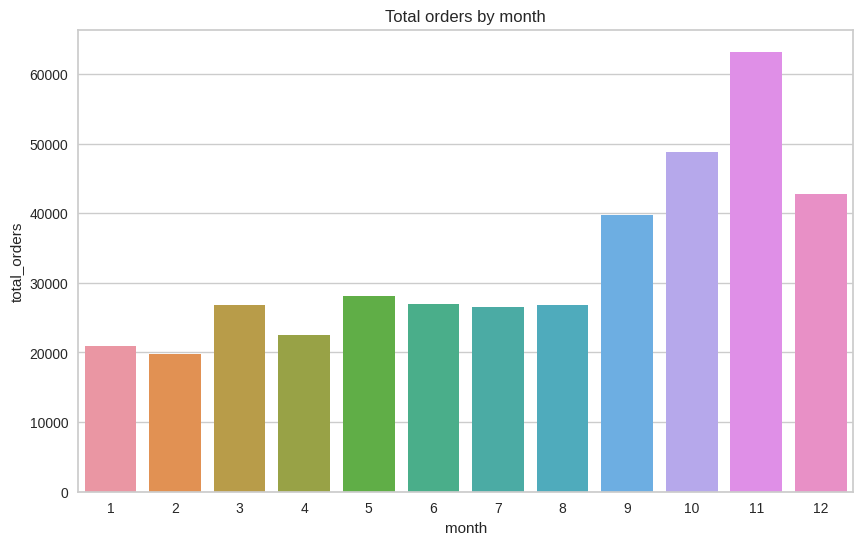

In [ ]:
# Ploting Number of orders based on months.
barplot(month_df)

##### 1. Why did you pick the specific chart?

> Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

* The month of November shows the highest number of orders among all the months, followed by October and December which also have a large number of orders.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> The chart provides valuable insights that can help businesses make informed decisions around marketing campaigns and inventory management. By understanding how the number of customers varies over time, businesses can allocate resources more effectively and make more informed decisions.

#### Chart - 3

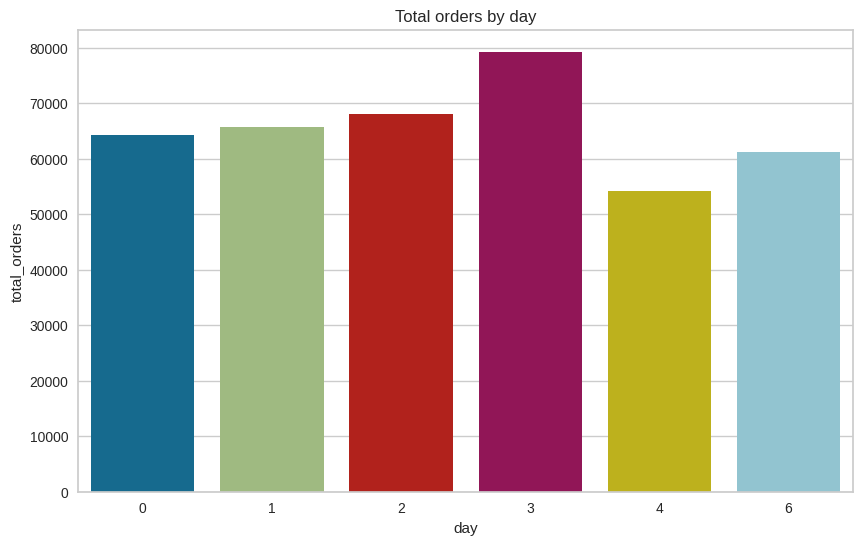

In [ ]:
# Cheacking number of total orders by Weekday.
barplot(day_df)

##### 1. What is/are the insight(s) found from the chart?

* Based on the graph you provided, it appears that the week starts on Monday (0) and Saturday (5) is the designated day off for the business. 
* The highest number of sales can be observed on Thuesday followed by Wednesday.

##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Yes, the insights gained from this chart can help the business make informed decisions about where to focus their marketing efforts, potentially increasing their sales and revenue.

#### Chart - 4

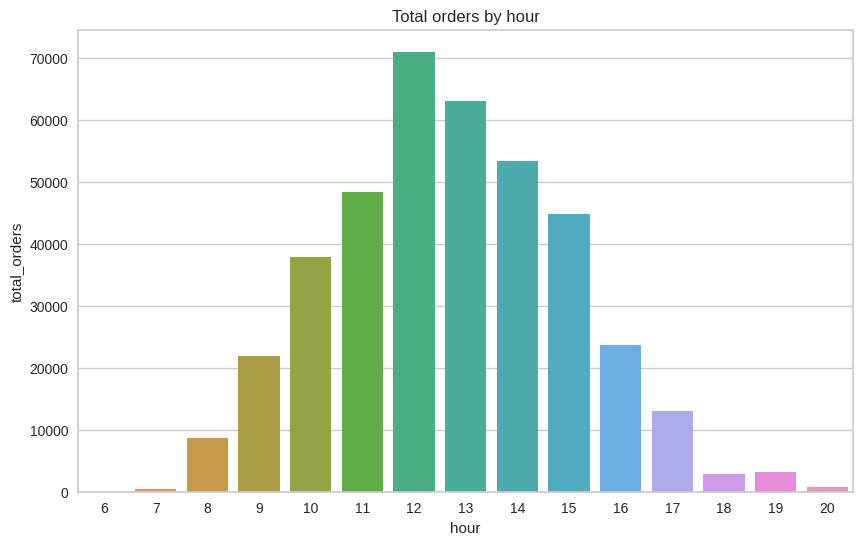

In [ ]:
# Checking number of total orders by hour.
barplot(hour_df)

##### 1. What is/are the insight(s) found from the chart?

* The potential business timings can be observed from 10 AM to 3PM.

##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> This chart can assist us in comprehending potential business timings, enabling us to make knowledgeable decisions regarding which areas to concentrate our marketing efforts on. This, in turn, could boost our sales and revenue.

#### Chart - 5

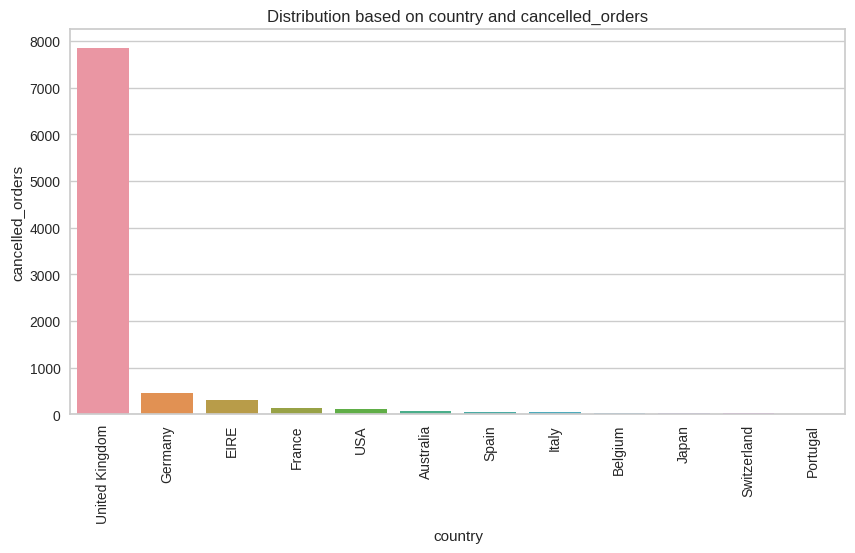

In [ ]:
# Ploting the number of orders cancelled based on country.
B_plot(cdf.head(12))

##### 1. What is/are the insight(s) found from the chart?

* The number countries with highest order cancelation rate is United Kingdom, Germany, EIRE, France, USA etc.

##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> This chart can provide valuable insights for the business to make smarter choices and increase its revenue. It can also help to investigate why there are many cancellations for these countries.

#### Chart - 6

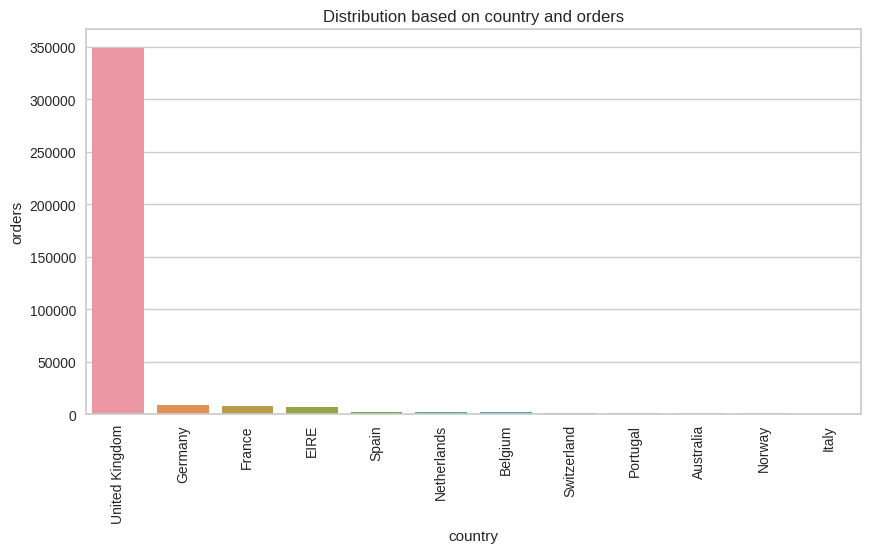

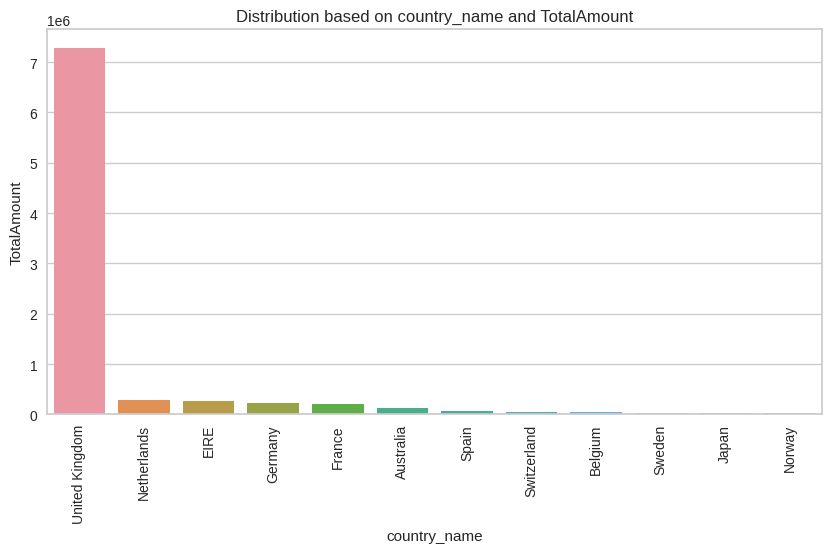

In [ ]:
# Checking number of total orders and number of total amount based on country.
B_plot(country_orders.head(12))
B_plot(country_df[['country_name','TotalAmount']].head(12))

##### 1. What is/are the insight(s) found from the chart?

*  The majority of customers are from the United Kingdom. Other significant customer groups include Germany, France, Eire, and Spain.

*  The majority of amount spend by the customers of united kigdom followed by Netherlands, Eire,Germany, France.



##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

> Yes, the insights gained from this chart can help the business make informed decisions about where to focus their marketing efforts, potentially increasing their sales and revenue.

#### Chart - 7

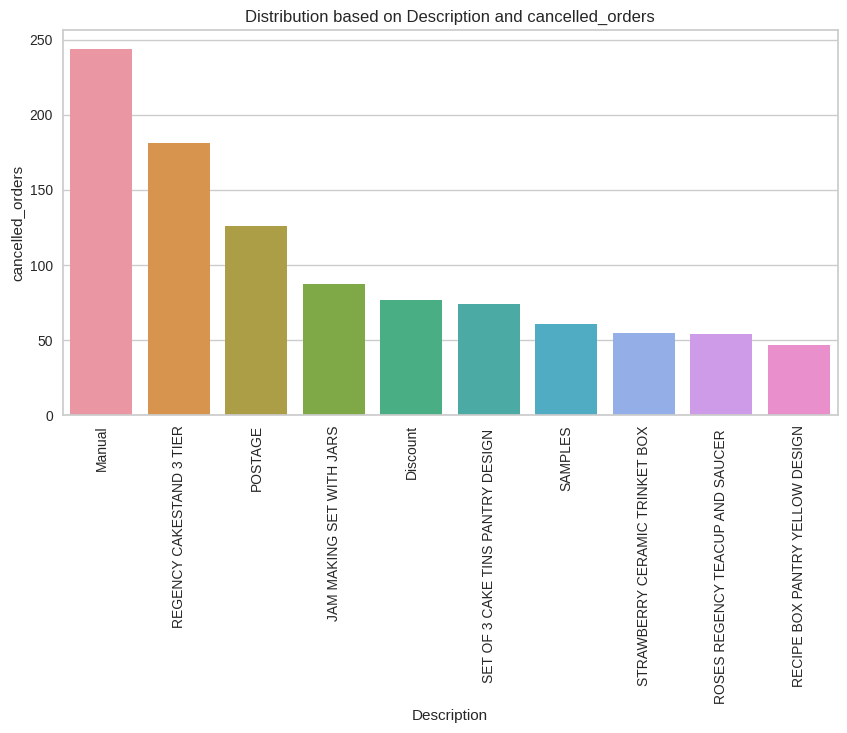

In [ ]:
# Checking top 10 item based on cancelled ordrs.
B_plot(cancel_o.head(10))

##### 1. What is/are the insight(s) found from the chart?

* Among all items the item Manual show highest cancelation followed by Refency Cakestand 3 Tier, postage, Jam Making Set With Jars.

##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart can provide valuable insights for the business to make smarter choices and increase its revenue. It can also help to investigate why there are many cancellations for these items.

#### Chart - 8

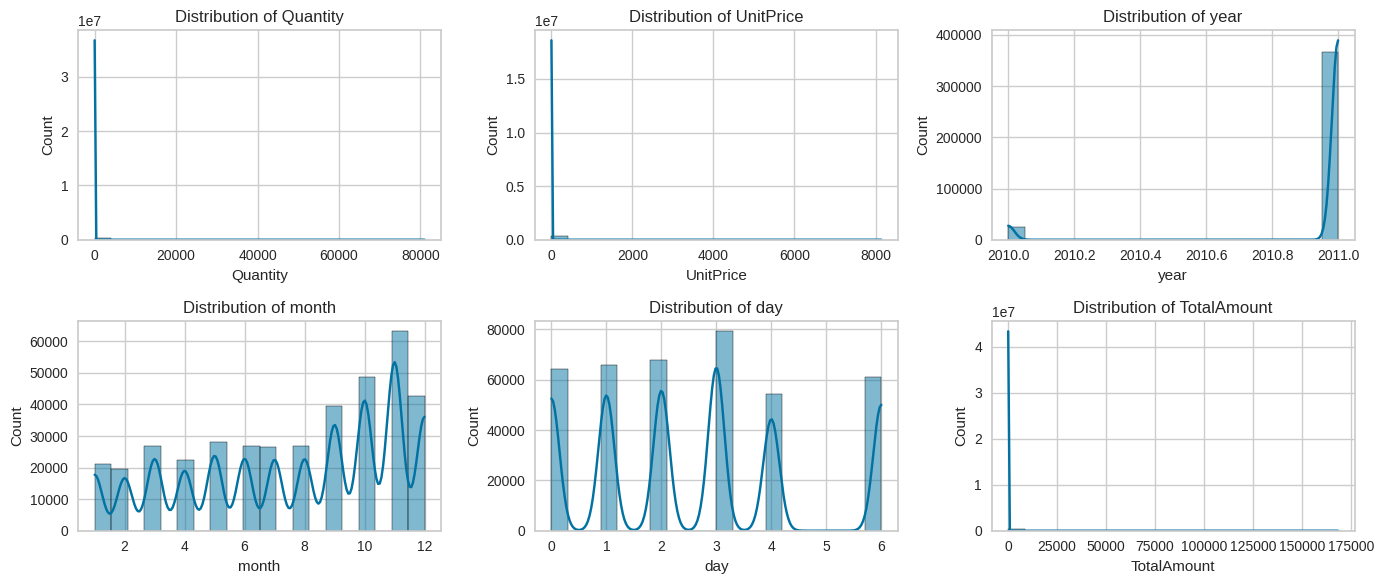

In [ ]:
# Visualize the distribution of numerical features
numerical_cols = ['Quantity', 'UnitPrice','year', 'month', 'day', 'TotalAmount']
rows=2
cols=3
counter=1
fig = plt.figure(figsize=(14, 6))
for col in numerical_cols:
    plt.subplot(rows,cols,counter)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    counter=counter+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

> Distribution plots allow us to visualize the shape, spread, and density of continuous data. This can be useful to compare the distributions of different groups or samples. This can help us identify similarities and differences between the groups and make inferences about population differences.

##### 2. What is/are the insight(s) found from the chart?

* It can be oserved the distribution of Totalamount, Quntity, Unit price and year is highly skewed.

#### Chart - 9

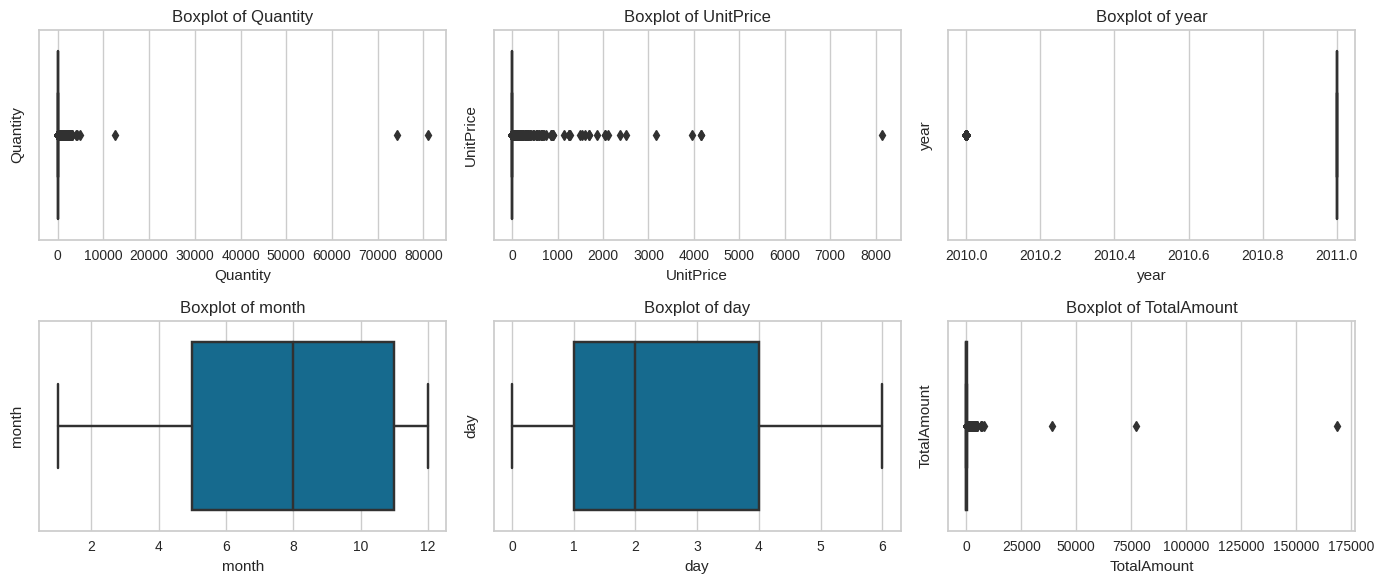

In [ ]:
# Visualize the boxplots for numerical features by price range
rows=2
cols=3
counter=1
fig = plt.figure(figsize=(14, 6))
for col in numerical_cols:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    counter=counter+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

> Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

* The numerical variables have very few outliers that can be disregarded as they may can represent some possible scenarios.

#### Chart - 10

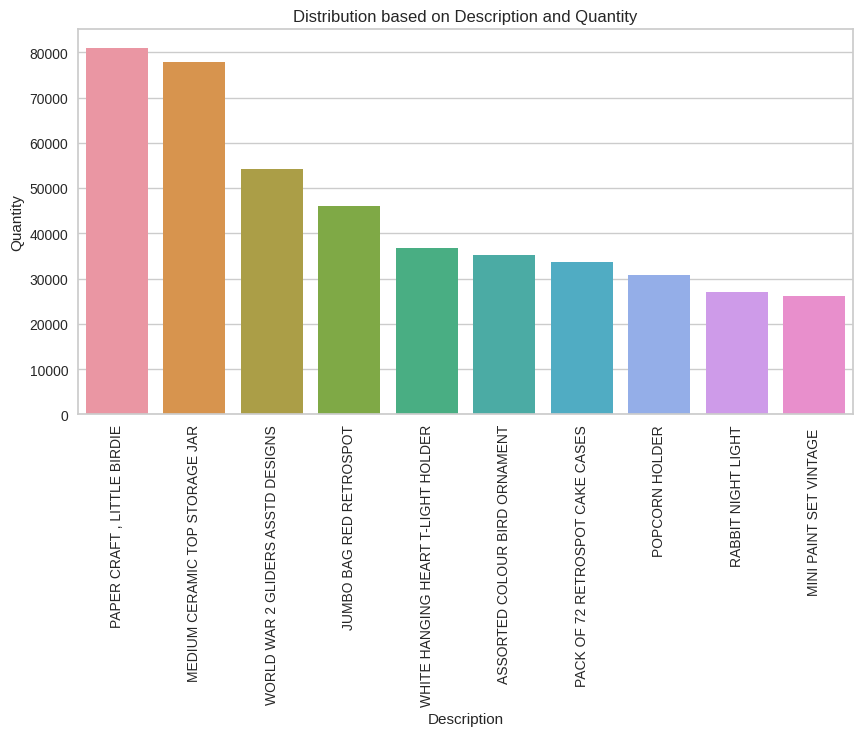

In [ ]:
# Checking top 10 items based on quantity.
B_plot(item_q.head(10))

##### 1. What is/are the insight(s) found from the chart?

##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! The insights gained from analyzing the chart can help business make data-driven decisions about their inventory management, marketing strategies, and overall operations. Identifying the most popular products can help businesses understand customer preferences and tailor their offerings to meet demand.

#### Chart - 11

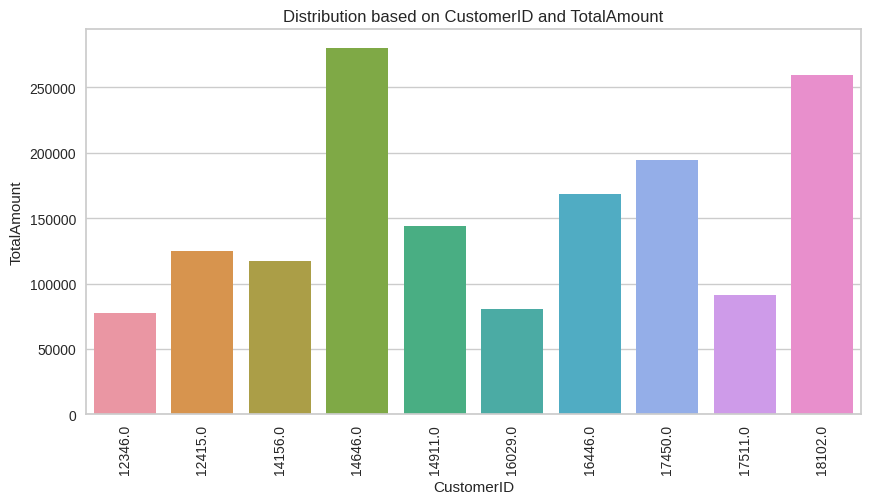

In [ ]:
# ploting top 10 customers based on total amount spend.
B_plot(top_c.head(10))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! The chart provides valuable insights that can help the business improve customer retention and acquisition strategies, as well as identify areas for improvement in customer service and product offerings.

#### Chart - 12

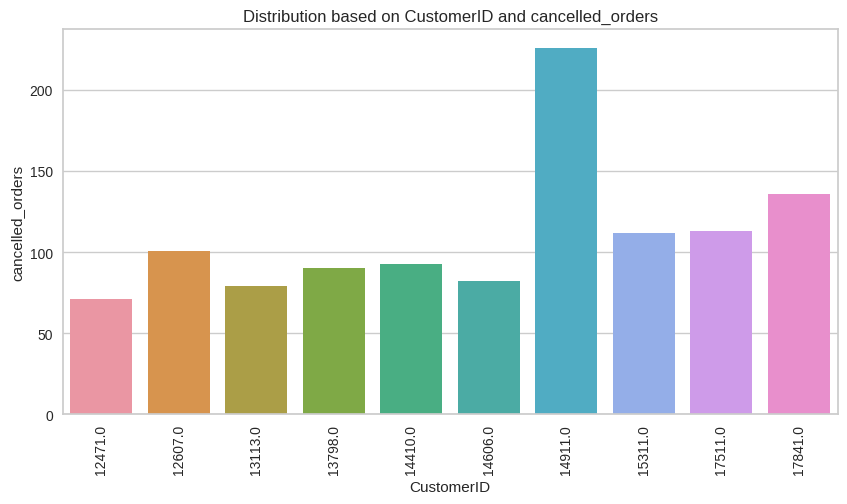

In [ ]:
# ploting top 10 customers based on cancelled_orders.
B_plot(most_c_orders.head(10))


##### 1. What is/are the insight(s) found from the chart?

* The maximum number of cancelled orders can be oserved by customerID : 14911.0 followed by 17841.0. and 175110.0.

##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! This chart can provide valuable insights for the business to make smarter choices and increase its revenue. It can also help to investigate why there are many cancellations orders from these customers.

#### Chart - 13

In [ ]:
# Correlation between Quantity and Total Amount of items Sold in United Kingdom:
fig = x.scatter(Top_uk_items, x="Quantity", y="TotalAmount", color="Quantity",size='Quantity',trendline="ols")
fig.update_layout(
    title="Correlation between Quantity and Total Amount of items Sold in United Kingdom:",
    autosize=True,
    width=800,
    height=500
)
fig.show()


##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. Scatter plots are used to observe relationships between variables. A linear regression is a straight line representation of relationship between an independent and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

There is very high Correlation in the Quantity and Total Amount of items Sold in United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes! This chart can be useful for the marketing team to gain more insights into the UK market, which is the main source of revenue.

#### Chart - 14 - Correlation Heatmap

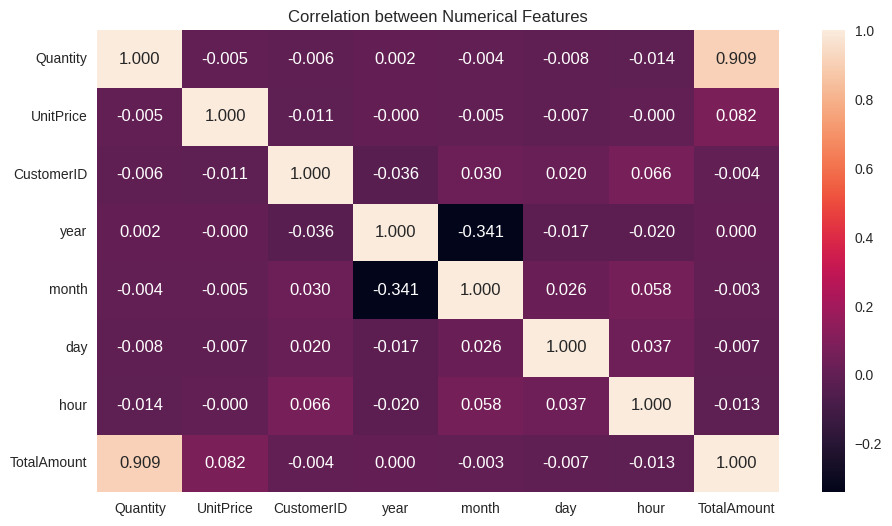

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(11,6))
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.title('Correlation between Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

> Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.Since we want find relationship between diffrent variables in dataframe and heatmap can be one of the way to visualize it.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
# sns.pairplot(df)
# plt.show()

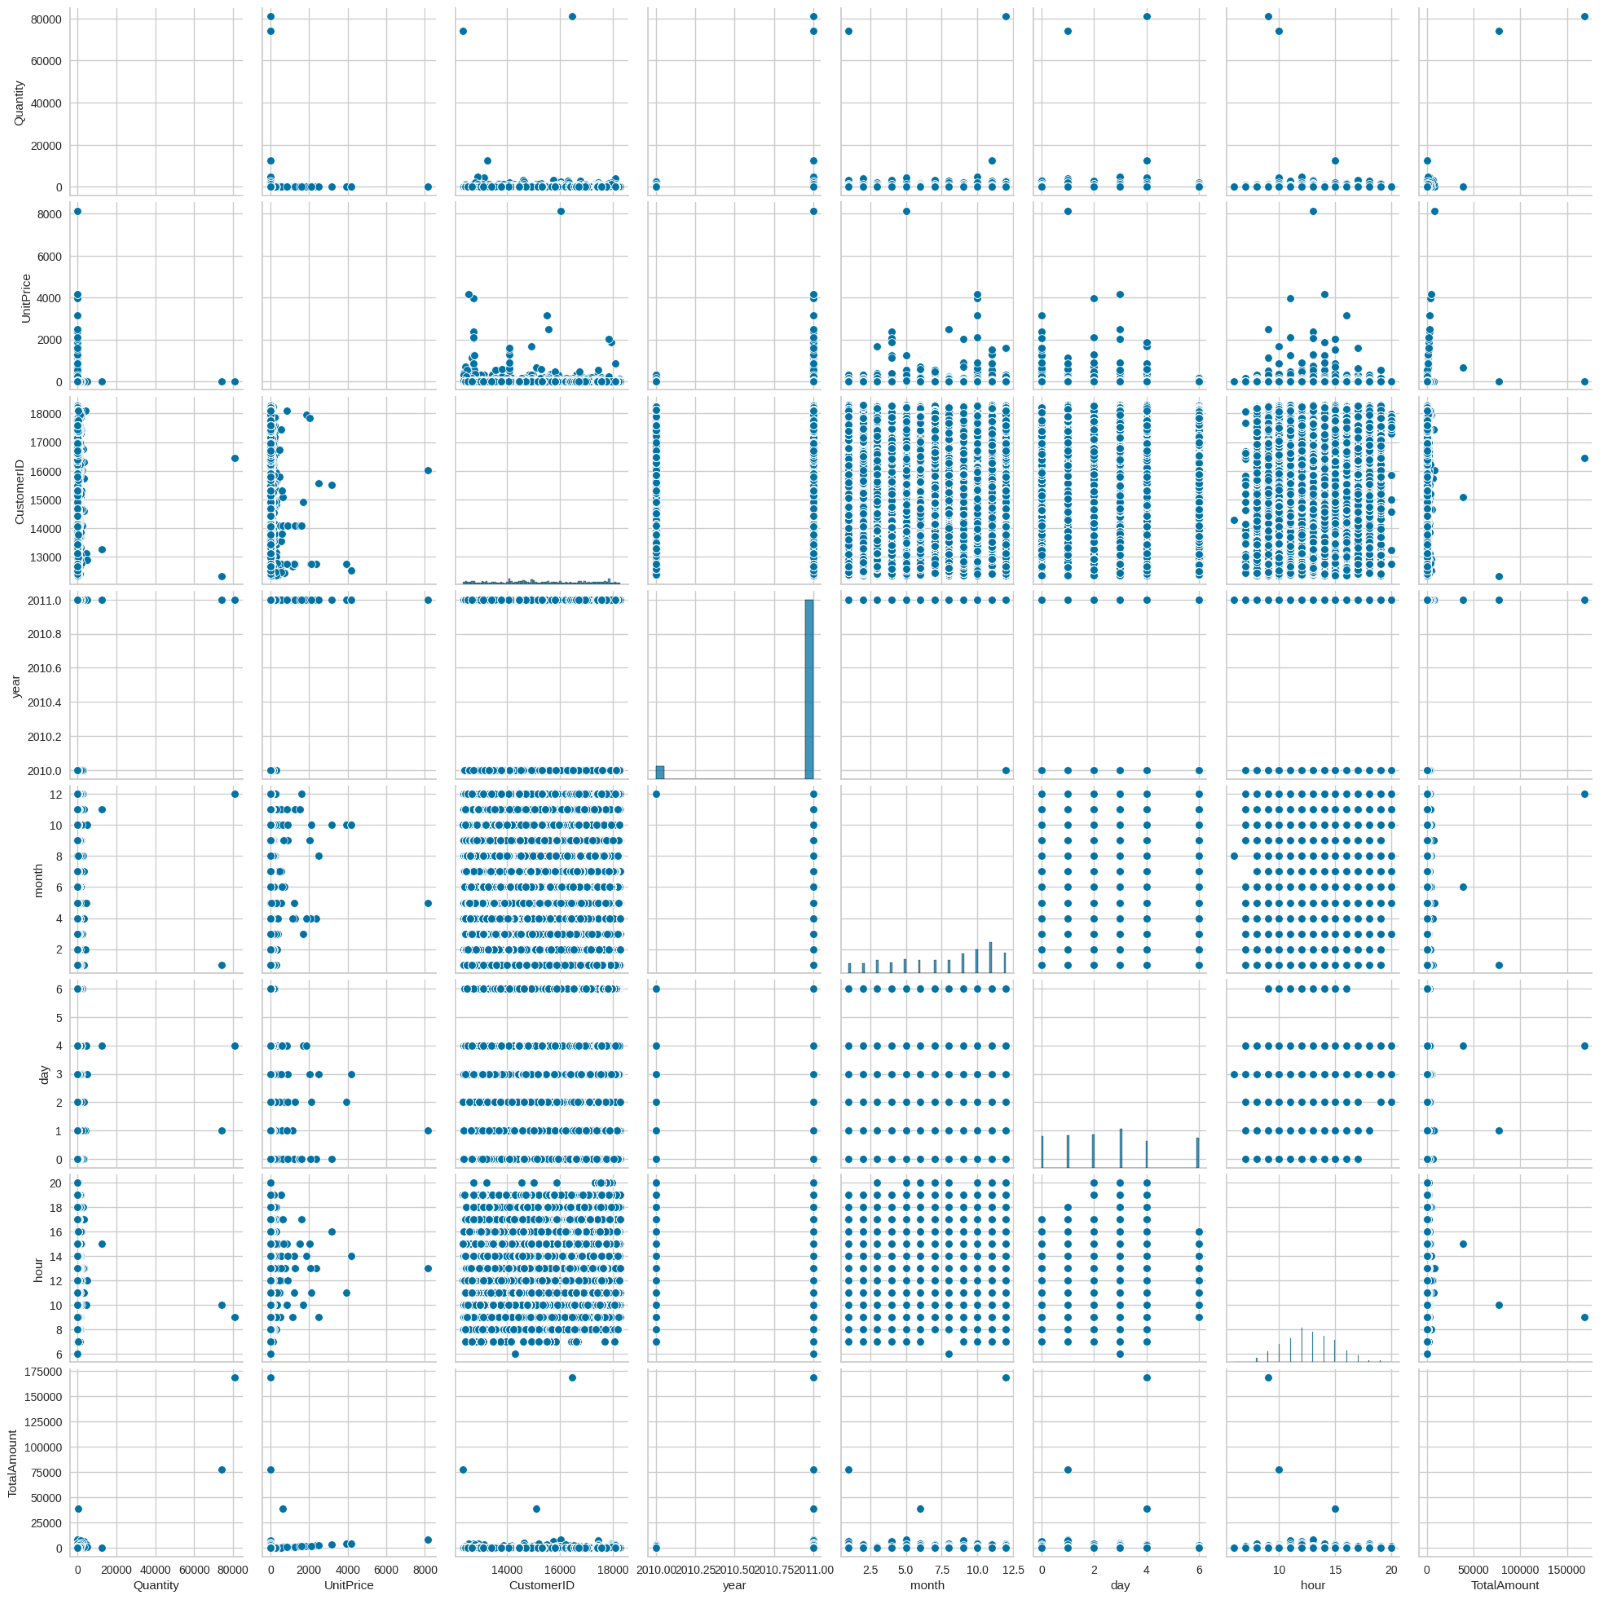

##### 1. Why did you pick the specific chart?

> A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and can be easily implemented in Python.

### **Insights from EDA:**

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average Quantity purchased by customers who made purchases during different months of the year.

Alternative Hypothesis (H1): There is a significant difference in the average Quantity purchased by customers who made purchases during different months of the year.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Group the data by month and calculate the average quantity purchased
month_groups = df.groupby('month')
month_avg_qty = month_groups['Quantity'].mean()

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Quantity'] for name, group in month_groups])

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA Test 

##### Why did you choose the specific statistical test?

One-way ANOVA is a statistical technique that is frequently employed to examine the distinction between three or more means, and it determines if the variation between groups is significantly greater than the variation within groups. 

In this scenario, we aim to assess if there is a substantial difference in the mean quantity purchased by customers who made purchases in different months of the year. ANOVA is a suitable test since we are comparing multiple months (groups).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average quantity purchased by customers from different countries.

Alternative Hypothesis (H1): There is a significant difference in the average quantity purchased by customers from different countries.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Create a list of the unique countries in the dataset
countries = country_df['country_name']

# Create a list to store the data for each country
country_data = []

# Loop through the countries and extract the quantity data for each one
for country in countries:
    country_quantity_data = df[df['Country'] == country]['Quantity']
    country_data.append(country_quantity_data)

# Perform a one-way ANOVA test
f_stat, p_value = stats.f_oneway(*country_data)

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA Test 

##### Why did you choose the specific statistical test?

To compare the means of the average quantity purchased by customers from different countries, a one-way ANOVA test is utilized in this case. ANOVA is suitable for comparing means of more than two groups (in this case, multiple countries) and determining whether their means are significantly different from each other.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the proportion of cancelled orders between different days of the week.

Alternative Hypothesis (H1): There is a significant difference in the proportion of cancelled orders between different days of the week.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# creating a table haveing weekdays ,cancelled order and total non_cancelled order 
table = pd.merge(cancelled_orders_by_day, day_df, on='day')
table.columns = ['DayOfWeek', 'Cancelled', 'Total']

# perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency([table['Cancelled'], table['Total']])

# Print the results
if p_value < 0.05:
    print('We are rejecting null hypothesis.')
else:
    print('We are accepting null hypothesis.')

We are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

chi-square test

##### Why did you choose the specific statistical test?

The chi-square test is a statistical tool that helps determine whether there is a significant relationship between two categorical variables. In this specific case, we created a contingency table by grouping the cancelled and not-cancelled orders by the day of the week. By applying the chi-square test to this table, we can determine whether there is a significant association between the day of the week and the number of cancelled orders.

# ***6. Feature Engineering & Data Pre-processing***

## 1. **RFM Analysis**

RFM analysis is a powerful marketing technique that segments customers based on their **recency** (time since last purchase), **frequency** (number of purchases), and **monetary** (amount spent) of their transactions. By analyzing these three metrics together, businesses can gain a better understanding of their customers and make data-driven decisions about marketing and customer engagement. RFM analysis helps businesses identify their high-value customers, as well as those who may be at risk of churn, and develop targeted marketing strategies to retain or re-engage them. Overall, RFM analysis is an effective way for businesses to optimize their marketing efforts and increase customer loyalty and satisfaction.

In [ ]:
# Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#This is to calculate the number of days from recent purchase
Latest_Date = max(df['InvoiceDate'])

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()}).reset_index()

#Convert Invoice Date into type int

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

# Printing the first 5 rows of rfm_df
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


### 2. Handling Missing Values & Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''Missing values and outliers will be addressed during data wrangling stage'''

'Missing values and outliers will be addressed during data wrangling stage'

## 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#checking quantile values for each attribute 
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,91.518322,90.512100,2048.215924
std,1721.889758,100.009747,225.515328,8984.248352
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,17.000000,17.000000,306.455000
50%,15299.000000,50.000000,41.000000,668.560000
75%,16778.500000,141.000000,98.000000,1660.315000
max,18287.000000,373.000000,7676.000000,280206.020000


In [ ]:
# Creating labels on the basis on quantile values.
rfm_df['r_score'] = pd.qcut(rfm_df['Recency'], q=[0,0.25,0.5,0.75,1], labels = [4,3,2,1])
rfm_df['f_score'] = pd.qcut(rfm_df['Frequency'], q=[0,0.25,0.5,0.75,1], labels = [1,2,3,4])
rfm_df['m_score'] = pd.qcut(rfm_df['Monetary'], q=[0,0.25,0.5,0.75,1], labels = [1,2,3,4])

In [ ]:
# calculating rfm_score by adding the r,f and m scores.
rfm_df['rfm_score'] = rfm_df['r_score'].astype(int) + rfm_df['f_score'].astype(int) + rfm_df['m_score'].astype(int)

In [ ]:
# Creating a function for customer segregation the fuction takes df as name of dataframe and col as rfm_score.
def customers_type(df, col):
    c = len(df[(df[col] >= 10) & (df[col] <= 12)])
    p = len(df[(df[col] >= 7) & (df[col] <= 9)])
    n = len(df[(df[col] >= 5) & (df[col] <= 6)])
    l = len(df[df[col] < 5])
    return [c, p, n, l]

In [ ]:
# applying function for customers segregation
customer_list = customers_type(rfm_df, 'rfm_score')

In [ ]:
# Printing the diffrent customer groups.
print('Champions:', customer_list[0])
print('Potentials:', customer_list[1])
print('Needs Attention:', customer_list[2])
print('Almost lost:', customer_list[3])

Champions: 1263
Potentials: 1332
Needs Attention: 975
Almost lost: 769


**Champions**: Customers with an RFM score between 10-12 are your most valuable customers who are loyal, highly engaged, and contribute a significant amount of revenue to your business.

**Potentials**: Customers with an RFM score between 7-9 are those who have made multiple purchases and spent a good amount of money, They have the potential to become loyal customers with targeted offers and promotions.

**Needs attention**: Customers with an RFM score between 5-6. They can be encouraged to make more purchases and become loyal customers with targeted offers and promotions.

**Almost Lost**: Customers with an RFM score between 3-4 have low scores in all three metrics and have not made a purchase in a long time. They are at risk of being lost and can be targeted with win-back campaigns to encourage them to return and make a purchase.

#### What all categorical encoding techniques have you used & why did you use those techniques?

> To conduct RFM analysis, I first generate three attributes: Recency, Frequency, and Monetary. These attributes are derived from the customer's last purchase, number of orders, and total amount spent. Once these attributes have been generated, I can create an additional attribute called RFM score. Using this score, I can then categorize customers based on their RFM score value. These steps are essential for performing RFM analysis.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation & Feature SelectionFeature Selection

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
'''Not Needed'''

'Not Needed'

### 5. Data Transformation

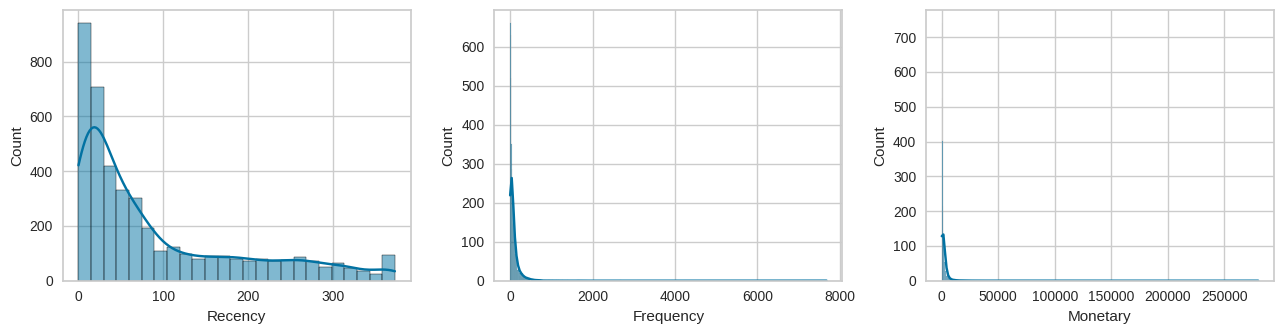

In [ ]:
# Checking distribution of Recency, frequency and monetary values.
rows=1 
cols=3
counter=1
fig = plt.figure(figsize=(13,3.5))
for i in ['Recency', 'Frequency', 'Monetary']:
  plt.subplot(rows,cols,counter)
  sns.histplot((rfm_df[i]),kde=True)
  counter=counter+1
  plt.tight_layout()

In [ ]:
# Applying log transformation on Recency, Frequency and Monetary values.
rfm_df[['Recency', 'Frequency', 'Monetary']] = np.log1p(rfm_df[['Recency', 'Frequency', 'Monetary']])

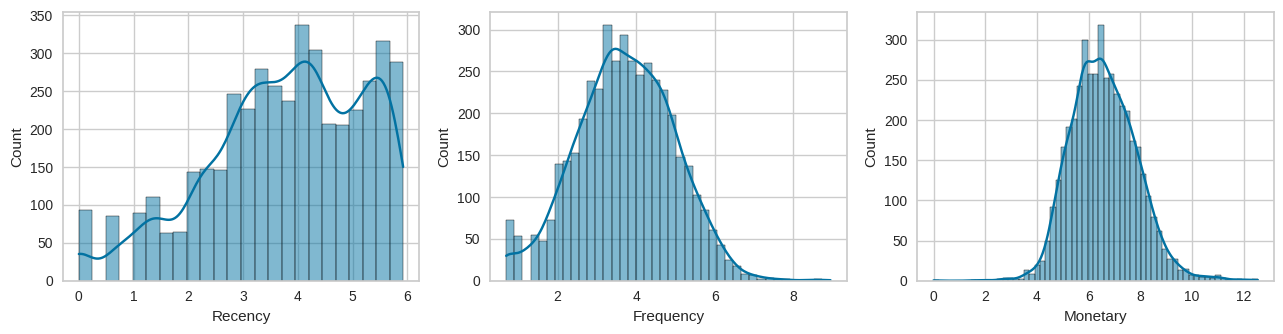

In [ ]:
# Checking distribution of Recency, frequency and monetary values after applying log tranformation.
rows=1 
cols=3
counter=1
fig = plt.figure(figsize=(13,3.5))
for i in ['Recency', 'Frequency', 'Monetary']:
  plt.subplot(rows,cols,counter)
  sns.histplot((rfm_df[i]),kde=True)
  counter=counter+1
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* We applied a log transformation to the variables Recency, Frequency and Monetary to make them more Gaussian-like.

* The log transformer is a family of parametric, monotonic transformations that are used to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

### 6. Data Scaling

In [ ]:
# Scaling your data
X = rfm_df[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
X = scaler.fit_transform(X.values)

##### Which method have you used to scale you data and why?

StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1.

## ***7. ML Model Implementation***

In [126]:
def plot_clusters_3d(X, centers, labels):
    """
    Plots clusters with centers.

    Parameters:
    -----------
    X : numpy array
        Data points to be plotted.
    centers : numpy array
        Cluster centers to be plotted.
    labels : numpy array
        Cluster labels for data points.

    Returns:
    -------- 
    3D scatter plot of the data points and cluster centers.
    """
      # Create Plotly figure object
    fig = go.Figure()

    # Data points
    fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode='markers',
        marker=dict(color=labels,colorscale='Rainbow',opacity=0.5,size=3),
        name='Data Points'))

    # Cluster centers
    fig.add_trace(go.Scatter3d(x=centers[:, 0], y=centers[:, 1], z=centers[:, 2],mode='markers',
        marker=dict(color=['cyan', 'black', 'red', 'blue'],size=8,symbol='diamond'),
        name='Cluster Centers'))

    # Set axis labels and title
    fig.update_layout(scene=dict(xaxis_title='Recency',yaxis_title='Frequency',zaxis_title='Monetary',
            aspectratio=dict(x=1, y=1, z=0.7),camera=dict(up=dict(x=0, y=0, z=1),eye=dict(x=1.5, y=-1.5, z=1))),
        title='Customer Segmentation based on Recency, Frequency, and Monetary')

    return fig

In [ ]:
def plot_clusters(X, labels):
    """
    Plots clusters without centers.

    Parameters:
    -----------
    X : numpy array
        Data points to be plotted.
    labels : numpy array
        Cluster labels for data points.

    Returns:
    -------- 
    3D scatter plot of the data points and cluster centers.
    """
    fig = go.Figure()

    fig.add_trace(go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode='markers',
        marker=dict(color= labels, colorscale='Rainbow', opacity=0.7, size=2.5),name='Data Points'))

    fig.update_layout(scene=dict(xaxis_title='Recency', yaxis_title='Frequency', zaxis_title='Monetary',
        aspectratio=dict(x=1, y=1, z=0.7), camera=dict(up=dict(x=0, y=0, z=1),eye=dict(x=1.5, y=-1.5, z=1))),
        title='Customer Segmentation based on Recency, Frequency, and Monetary')

    return fig

In [ ]:
#Dictionary for storing scores
score_dict = []

#**K-Means Clustering**

## Applying Elbow and Silhouette Method on X for finding the number of clusters. 

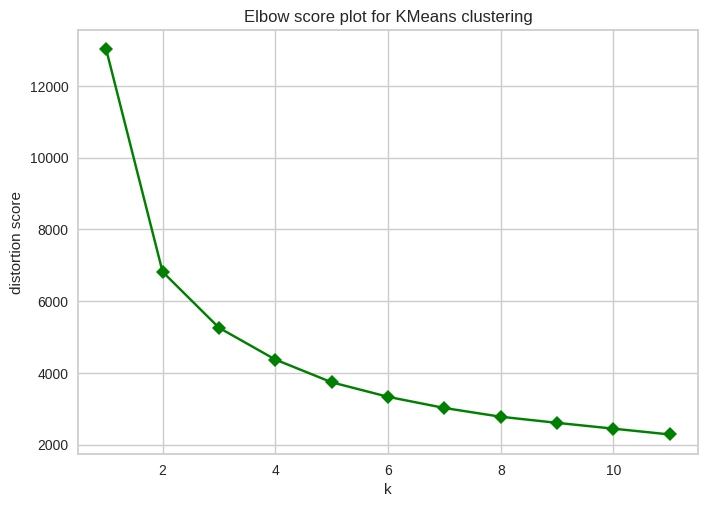

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), metric='distortion', timings=False, locate_elbow=False, title='Elbow score plot for KMeans clustering')

# Fit the data to the visualizer
visualizer.fit(X)        
visualizer.finalize()
elbow_line = visualizer.ax.lines[0]
elbow_line.set_color('green')        

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11))

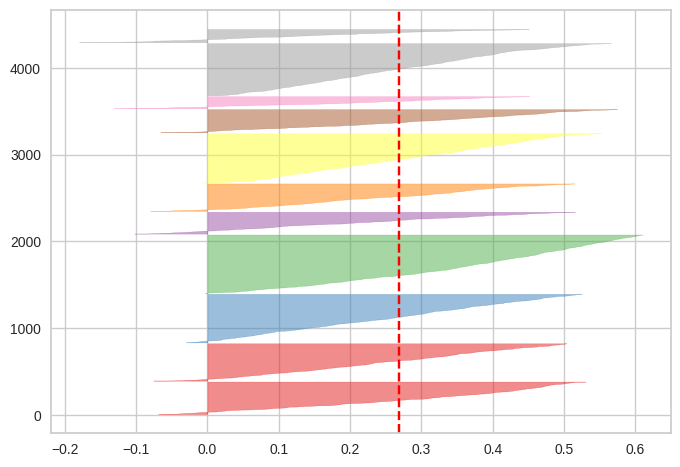

In [ ]:
# Instantiate the SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, k=(2,12), metric='silhouette', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X) 

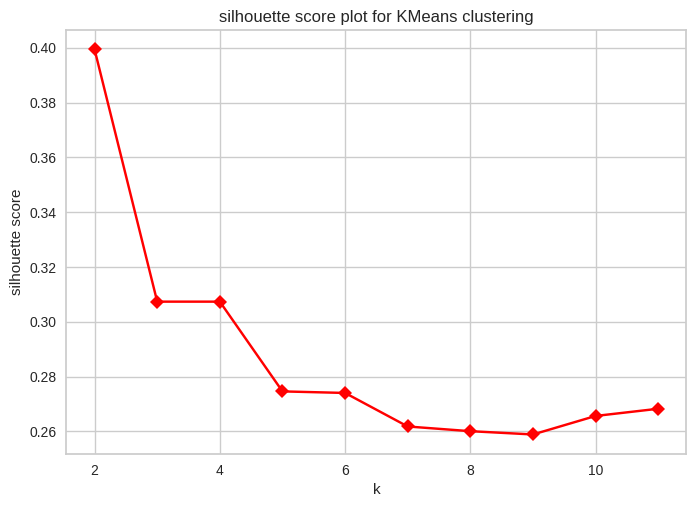

In [ ]:
# Instantiate the KElbowVisualizer for visualize the elbow plot for silhouette metric.
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False, locate_elbow=False,title='silhouette score plot for KMeans clustering')

# Fit the data to the visualizer
visualizer.fit(X)
visualizer.finalize()
elbow_line = visualizer.ax.lines[0]
elbow_line.set_color('red')

## *K-Means Clustering ML Model Implementation*

In [116]:
# Define number of clusters
''' Through the application elbow and sihoutte scores the optimal number of clusters 
for representing the underlying structure of the data has been determined to be 4.'''
clusters = 4

# Instantiate k-means object
km_model = KMeans(n_clusters= 4)

# Fit the model to the data
km_model.fit(X)

# Get cluster labels for each data point
km_labels = km_model.labels_

# Get cluster centers
km_centers = km_model.cluster_centers_

# Output results
print('Cluster labels:', km_labels[:300])
print('Cluster centers:', km_centers)

Cluster labels: [0 3 0 0 2 0 2 0 2 0 3 1 3 0 2 3 2 3 2 1 0 0 0 2 1 1 0 0 0 3 3 0 1 2 3 0 1
 0 0 3 0 0 0 2 2 2 0 3 0 0 0 2 0 0 2 3 3 0 0 1 0 3 0 0 2 1 3 3 2 3 0 3 0 0
 2 3 3 2 1 3 2 0 2 1 3 2 3 1 0 0 0 0 0 0 0 0 0 1 1 0 3 3 3 3 0 3 3 1 1 3 3
 3 3 1 2 3 1 2 2 0 0 1 3 0 0 1 2 0 1 2 0 2 0 0 2 0 3 3 2 0 0 2 3 3 3 2 3 0
 1 1 0 0 3 1 3 3 0 1 0 0 2 2 0 2 1 3 0 3 1 2 3 2 3 2 2 2 3 3 1 1 2 2 0 0 3
 2 2 2 2 3 3 0 1 1 2 1 0 2 2 2 0 0 3 3 0 0 2 2 1 2 0 0 0 0 0 0 2 3 0 1 1 3
 0 3 2 2 0 0 3 3 1 1 0 0 0 3 1 2 0 2 0 0 2 0 1 3 2 0 1 2 0 0 1 3 1 1 2 1 3
 3 2 0 3 0 3 2 1 0 0 3 0 1 3 3 3 3 3 2 0 0 2 1 0 0 1 0 3 0 1 2 3 3 2 3 3 0
 3 1 3 2]
Cluster centers: [[ 0.32898183  0.39799472  0.37520545]
 [-0.77185401 -0.24865267 -0.34971958]
 [ 0.86148569 -0.96714359 -0.90602228]
 [-1.22138568  1.27683935  1.30934049]]


In [127]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values.
plot_clusters_3d(X,km_centers, km_labels)

In [ ]:
# ploting silhouette_score evaluate the model range (2,8).
for p in range(2, 8):
    kmeans = KMeans(n_clusters=p)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", p, ", the average silhouette_score is :", silhouette_avg)

For n_clusters = 2 , the average silhouette_score is : 0.39925729808330224
For n_clusters = 3 , the average silhouette_score is : 0.30738107901371664
For n_clusters = 4 , the average silhouette_score is : 0.30727526730386856
For n_clusters = 5 , the average silhouette_score is : 0.27624708674328663
For n_clusters = 6 , the average silhouette_score is : 0.2736352885324413
For n_clusters = 7 , the average silhouette_score is : 0.2619866119842092


In [ ]:
#Adding scores to the model dictionary
score_dict.append(['K means Clustering',4,'Silhouette score',0.307275])

> To evaluate the KMeans clustering model, I used the silhouette_score metric. The optimal number of clusters were determined to be 4 based on the optimal silhouette score.

# **Hierarchial Clustering (Agglomerative)**

## Applying dendrogram on X for finding the number of clusters.

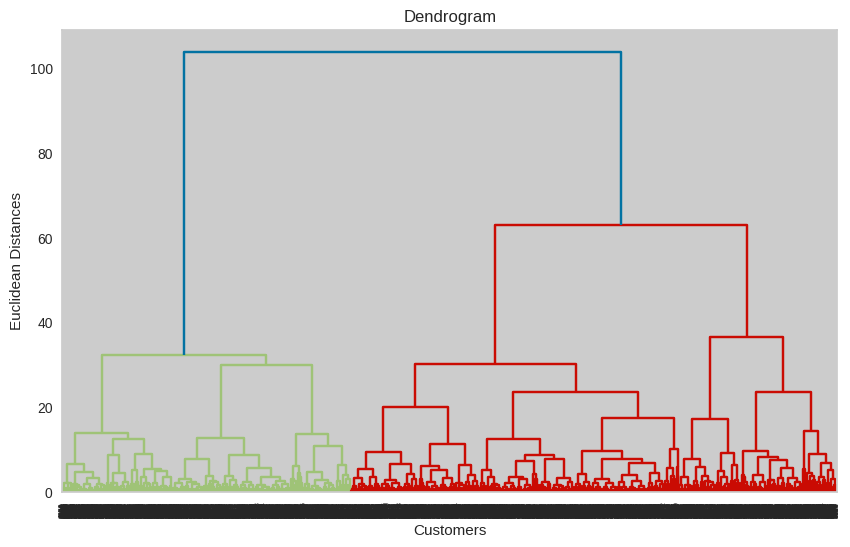

In [ ]:
# create the dendrogram using ward linkage method
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

# set the title and labels for the plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

# show the dendrogram
plt.show()

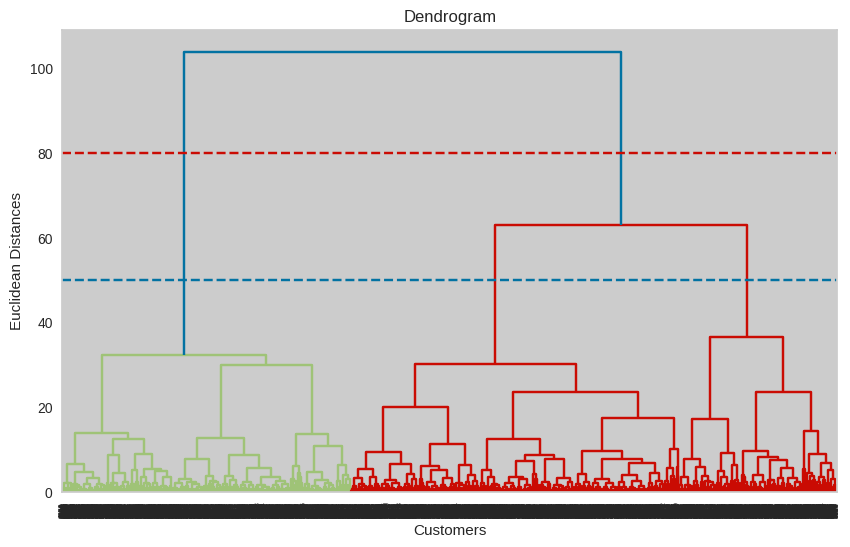

In [ ]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# set the title and labels for the plot
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

# find largest vertical distance we can make without crossing any other horizontal line
plt.axhline(y=80, color='r', linestyle='--')
plt.axhline(y=50, color='b', linestyle='--')
# show the dendrogram
plt.show() 

In [ ]:
# Fitting hierarchical clustering to X

# Define number of clusters
c = 2

# Perform Agglomerative clustering
h_model = AgglomerativeClustering(n_clusters = c, affinity = 'euclidean', linkage = 'ward')

# Get cluster labels for each data point
h_labels = h_model.fit_predict(X)

In [ ]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values.
plot_clusters(X, labels= h_labels)

In [ ]:
# ploting silhouette_score evaluate the model range (2,8).
for c in range(2, 8):
    acmodel = AgglomerativeClustering(n_clusters = c, affinity = 'euclidean', linkage = 'ward')
    aclabels = acmodel.fit_predict(X)
    silhouette_avg = silhouette_score(X, aclabels)
    print("For n_clusters =", c, ", the average silhouette_score is :", silhouette_avg)

For n_clusters = 2 , the average silhouette_score is : 0.3441878928003531
For n_clusters = 3 , the average silhouette_score is : 0.28647309273229926
For n_clusters = 4 , the average silhouette_score is : 0.27333011303809496
For n_clusters = 5 , the average silhouette_score is : 0.22823330422647747
For n_clusters = 6 , the average silhouette_score is : 0.19720838826045675
For n_clusters = 7 , the average silhouette_score is : 0.20560144302271066


In [ ]:
#Adding scores to the model dictionary
score_dict.append(['Hierarchial Clustering',2,'Silhouette score','0.3441878'])

> To evaluate the Hierarchial Clustering (Agglomerative) model, I used the silhouette score metric. The optimal number of clusters were determined to be 2 based on the optimal silhouette score.

# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

In [ ]:
# Instantiate DBSCAN object
d_model = DBSCAN()

# Get cluster labels for each data point
d_lable = d_model.fit_predict(X)

In [ ]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values on default parameters
plot_clusters(X, labels= d_lable)

In [ ]:
# Create two numpy array for perform Hyperparameter tuneing  
# eps_range = np.arange(0.1, 1.2, 0.1)
# min_samples_range = np.arange(2, 8)

# Creating variables to store best hyperparameters
# best_eps = None
# best_min_samples = None
# best_silhouette = -1

# Creating a loop for iterate over every parameter
# for eps in eps_range:
#     for min_samples in min_samples_range:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         d_labels = dbscan.fit_predict(X)
#         silhouette = silhouette_score(X, d_labels)

#         if silhouette > best_silhouette:
#             best_silhouette = silhouette
#             best_eps = eps
#             best_min_samples = min_samples
            
# Print best hyperparameters and corresponding scores
# print(f"\nBest Hyperparameters: epsilon={best_eps}, min_samples={best_min_samples}")
# print(f"Corresponding Silhouette Score: {best_silhouette}")

'''Best Hyperparameters: epsilon=1.1, min_samples=7 Corresponding Silhouette Score: 0.5839081513715018'''


'Best Hyperparameters: epsilon=1.1, min_samples=7 Corresponding Silhouette Score: 0.5839081513715018'

In [ ]:
# Instantiate DBSCAN object
tuned_d_model = DBSCAN(eps = 1.1, min_samples=7)

# Get cluster labels for each data point
tuned_d_lable = tuned_d_model.fit_predict(X)

In [ ]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values on tuned parameters
plot_clusters(X, labels= tuned_d_lable)

In [ ]:
#Adding scores to the model dictionary
score_dict.append(['DBSCAN',2,'Silhouette Score', 0.583908])

##### Which hyperparameter optimization technique have you used and why?

I utilized a brute-force grid search technique for optimizing the hyperparameters, and evaluating the resulting clustering's silhouette score. I chose this approach because it is relatively easy to implement and can be effective when dealing with a manageable number of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying the tuned hyperparameters, a significant improvement has been observed in its performance. 

# **Gaussian Mixture Model (GMM)**

In [ ]:
# Define number of clusters
''' Through the application elbow and sihoutte scores the optimal number of clusters 
for representing the underlying structure of the data has been determined to be 4.'''
clusters = 4

# Initialize GMM model
gmm = GaussianMixture(n_components=clusters)

# Fit the model on data
gmm.fit(X)

# Get predicted cluster labels for data
g_labels = gmm.predict(X)

In [ ]:
# Plotting a graph that shows the distribution of customers based on their Recency, Frequency, and Monetary values.
plot_clusters(X, labels= g_labels)

In [ ]:
# define a range of components for computeing the bic score.
n_components_range = range(1, 8)

#intalize the lowest_bic
lowest_bic = np.infty

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)

    # Calculate BIC scores
    bic = gmm.bic(X)
    
    # Update variables if a lower score is found
    if bic < lowest_bic:
        lowest_bic = bic

    print(f"BIC at {n_components}: {lowest_bic}")

BIC at 1: 31837.258718417084
BIC at 2: 31023.445352029845
BIC at 3: 30431.71326261635
BIC at 4: 29849.398652501488
BIC at 5: 29849.398652501488
BIC at 6: 29794.12571547562
BIC at 7: 29705.7434401959


In [ ]:
#Adding scores to the model dictionary
score_dict.append(['Gaussian Mixture Model',4,'Bayesian Information Criterion', 29852.74])

To evaluate the Gaussian Mixture Model, I used the BIC scores metric. The optimal number of clusters were determined based of optimal  Bayesian Information Criterion score.

### 1. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Creating a dataframe from score_dict
pd.DataFrame(score_dict,columns = ['Model Name','Optimal clusters','Evaluation Metric','Metric Score'])

,Model Name,Optimal clusters,Evaluation Metric,Metric Score
0,K means Clustering,4,Silhouette score,0.307275
1,Hierarchial Clustering,2,Silhouette score,0.3441878
2,DBSCAN,2,Silhouette Score,0.583908
3,Gaussian Mixture Model,4,Bayesian Information Criterion,29852.74


* K means Clustering can be considered as it is giving optimal evaluation metric results and optimal number of clusters.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
filename = 'Online_Retail_Customer_Segmentation.sav'
pickle.dump(km_model, open(filename, 'wb'))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***